## ANN Model

In [1]:
from datetime import datetime
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pylab import rcParams

# set maximum display rows as 200
pd.set_option('display.max_rows', 200)

plt.style.use('ggplot') # use ggplot styling
# displays graphs in the notebook
%matplotlib inline

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

Using TensorFlow backend.
C:\Users\User\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\User\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\User\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\User\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529

In [2]:
df =pd.read_sql_table('coffee_machine', 'sqlite:///dissertation.db') 

In [3]:
df_copy = df.copy()

In [5]:
df_copy [219800:220000]

,time,mean_power,weekofyear,day_name,hour,mins,day_type,kWh
219800,2020-01-17 10:33:20,0.00,3,4,10,33,weekday,0.000000e+00
219801,2020-01-17 10:33:30,0.00,3,4,10,33,weekday,0.000000e+00
219802,2020-01-17 10:33:40,0.00,3,4,10,33,weekday,0.000000e+00
219803,2020-01-17 10:33:50,0.00,3,4,10,33,weekday,0.000000e+00
219804,2020-01-17 10:34:00,0.00,3,4,10,34,weekday,0.000000e+00
219805,2020-01-17 10:34:10,0.00,3,4,10,34,weekday,0.000000e+00
219806,2020-01-17 10:34:20,0.00,3,4,10,34,weekday,0.000000e+00
219807,2020-01-17 10:34:30,0.00,3,4,10,34,weekday,0.000000e+00
219808,2020-01-17 10:34:40,0.00,3,4,10,34,weekday,0.000000e+00
219809,2020-01-17 10:34:50,0.00,3,4,10,34,weekday,0.000000e+00


In [4]:
# group by half an hour, and change kWh to Wh in order to enlarge the number
df_half = pd.DataFrame ({'Half_Wh':(df_copy.groupby(pd.Grouper(freq='30T',key='time'))['kWh'].sum().ffill()*1000)})

In [7]:
# prepare data for clustering
df_half['weekofyear']=df_half.index.week
df_half['day_categ']=df_half.index.day_name()
df_half['day_num']=df_half.index.weekday
#df_half['day']=df_half.index.day
df_half['hour']=df_half.index.hour


# prepare day_type --> weekday, weekend, holiday
df_half['day_type'] = df_half['day_num'].apply(lambda x: 'weekday' if x <5 else 'weekend')
df_half.loc[(df_half.index >= '2019-12-24 00:00:00') & (df_half.index < '2019-12-26 00:00:00'), 'day_type']='holiday'
df_half.loc[(df_half.index >= '2020-01-01 00:00:00') & (df_half.index < '2020-01-02 00:00:00'), 'day_type']='holiday'

# prepare morning, afternoon, and night 
df_half['time_of_day'] =df_half['hour'].apply(lambda x: 'morning' if (x>=7) & (x<= 12) else ('afternoon' if (x>12) & (x<=18) else 'night'))

# lockdown
df_half.loc[(df_half.weekofyear >=12) & (df_half.weekofyear <24), 'day_type'] = 'holiday'


df_half['hour']=df_half.index.strftime('%H')

In [31]:
sun = pd.DataFrame(df_half['hour'])
sun['month'] = sun.index.strftime('%b')

In [32]:
sun

,hour,month
time,,
2019-12-23 00:00:00,00,Dec
2019-12-23 00:30:00,00,Dec
2019-12-23 01:00:00,01,Dec
2019-12-23 01:30:00,01,Dec
2019-12-23 02:00:00,02,Dec
...,...,...
2020-06-07 21:30:00,21,Jun
2020-06-07 22:00:00,22,Jun
2020-06-07 22:30:00,22,Jun


In [33]:
df_half

,Half_Wh,weekofyear,day_categ,day_num,hour,day_type,time_of_day
time,,,,,,,
2019-12-23 00:00:00,0.0,52,Monday,0,00,weekday,night
2019-12-23 00:30:00,0.0,52,Monday,0,00,weekday,night
2019-12-23 01:00:00,0.0,52,Monday,0,01,weekday,night
2019-12-23 01:30:00,0.0,52,Monday,0,01,weekday,night
2019-12-23 02:00:00,0.0,52,Monday,0,02,weekday,night
...,...,...,...,...,...,...,...
2020-06-07 21:30:00,0.0,23,Sunday,6,21,holiday,night
2020-06-07 22:00:00,0.0,23,Sunday,6,22,holiday,night
2020-06-07 22:30:00,0.0,23,Sunday,6,22,holiday,night


In [512]:
df_train_test

,Half_Wh
time,
2019-12-23 00:00:00,0.000000
2019-12-23 00:30:00,0.000000
2019-12-23 01:00:00,0.000000
2019-12-23 01:30:00,0.000000
2019-12-23 02:00:00,0.000000
...,...
2020-05-05 07:00:00,0.002778
2020-05-05 07:30:00,0.001389
2020-05-05 08:00:00,0.001389


In [114]:
# subset 80% of dataset for train and test, 20% for prediction
subset_num = 6451
df_train_test = df_half[['Half_Wh']][:subset_num]
df_valid = df_half[['Half_Wh']][subset_num:]

# transform 
train_test=df_train_test.values
train_test=train_test.astype('float32')

valid=df_valid.values
valid=valid.astype('float32')

In [115]:
# split into train and test sets
train_size = int(len(train_test) * 0.55)
test_size = len(train_test) - train_size
train, test = train_test[0:train_size], train_test[train_size:len(train_test)]
print(len(train), len(test))

3548 2903


In [83]:
# manipulate data to x,and y
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [84]:
# create train and test dataset, and vaild dataset
look_back=96
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
validX, validY = create_dataset(valid, look_back)

In [182]:
# add extra variables day_type and time of the day

# extract the train variables for same length
df_train_var=df_half[['time_of_day','day_type']][:len(trainX)]
# get dummies
df_dum_train=pd.get_dummies(df_train_var)

# extract the test variables for same length
df_test_var=df_half[['time_of_day','day_type']][len(trainX):len(trainX)+len(testX)]
# get dummies
df_dum_test=pd.get_dummies(df_test_var)

# extract the validation variables for same length
df_valid_var=df_half[['time_of_day','day_type']][len(trainX)+len(testX):len(trainX)+len(testX)+len(validX)]
# get dummies
df_dum_valid=pd.get_dummies(df_valid_var)
df_dum_valid['day_type_weekday']=0
df_dum_valid['day_type_weekend']=0

In [164]:
#to np
np_train=np.array(df_dum_train)

#to np
np_test=np.array(df_dum_test)

#to np
np_valid=np.array(df_dum_valid)

In [165]:
#concatenate trainX, testX, validX with variables, respectively
trainX_ok = np.concatenate((trainX, np_train),axis=1)
testX_ok = np.concatenate((testX, np_test),axis=1)
validX_ok = np.concatenate((validX, np_valid),axis=1)

In [85]:
# create and fit Multilayer Perceptron model

model = Sequential()
model.add(Dense(180, input_dim=look_back, activation='relu'))
model.add(Dense(120, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mse','mae','mape'])
history = model.fit(trainX, trainY, epochs=250, batch_size=10, verbose=2)

Epoch 1/250
 - 1s - loss: 2048.1397 - mse: 2048.1399 - mae: 25.7469 - mape: 9058052096.0000
Epoch 2/250
 - 0s - loss: 1712.8395 - mse: 1712.8390 - mae: 21.8015 - mape: 6105056256.0000
Epoch 3/250
 - 0s - loss: 1478.1826 - mse: 1478.1827 - mae: 19.6188 - mape: 5295714304.0000
Epoch 4/250
 - 0s - loss: 1307.5316 - mse: 1307.5315 - mae: 18.4676 - mape: 4790492672.0000
Epoch 5/250
 - 0s - loss: 1188.3830 - mse: 1188.3829 - mae: 17.5634 - mape: 4396827136.0000
Epoch 6/250
 - 1s - loss: 1038.8662 - mse: 1038.8657 - mae: 16.1485 - mape: 3975141632.0000
Epoch 7/250
 - 0s - loss: 849.4080 - mse: 849.4077 - mae: 14.7012 - mape: 3530121728.0000
Epoch 8/250
 - 0s - loss: 678.4189 - mse: 678.4190 - mae: 12.9157 - mape: 3086767104.0000
Epoch 9/250
 - 0s - loss: 560.7960 - mse: 560.7962 - mae: 11.8399 - mape: 2809762304.0000
Epoch 10/250
 - 1s - loss: 456.6821 - mse: 456.6822 - mae: 10.6174 - mape: 2483170304.0000
Epoch 11/250
 - 1s - loss: 359.2449 - mse: 359.2450 - mae: 9.4258 - mape: 2323294208.00

Epoch 94/250
 - 1s - loss: 52.9680 - mse: 52.9680 - mae: 2.8925 - mape: 292561792.0000
Epoch 95/250
 - 1s - loss: 51.6973 - mse: 51.6972 - mae: 2.8667 - mape: 283014048.0000
Epoch 96/250
 - 1s - loss: 47.6378 - mse: 47.6377 - mae: 2.7470 - mape: 298126912.0000
Epoch 97/250
 - 1s - loss: 49.3620 - mse: 49.3620 - mae: 2.7649 - mape: 282765536.0000
Epoch 98/250
 - 1s - loss: 59.9187 - mse: 59.9187 - mae: 3.0334 - mape: 304946784.0000
Epoch 99/250
 - 1s - loss: 60.0574 - mse: 60.0574 - mae: 3.1672 - mape: 286609248.0000
Epoch 100/250
 - 1s - loss: 55.1108 - mse: 55.1108 - mae: 2.9623 - mape: 282664672.0000
Epoch 101/250
 - 1s - loss: 56.0810 - mse: 56.0810 - mae: 3.0516 - mape: 264394864.0000
Epoch 102/250
 - 1s - loss: 62.8539 - mse: 62.8539 - mae: 3.1914 - mape: 317921792.0000
Epoch 103/250
 - 1s - loss: 58.8929 - mse: 58.8929 - mae: 3.0977 - mape: 323686336.0000
Epoch 104/250
 - 1s - loss: 45.7266 - mse: 45.7266 - mae: 2.6824 - mape: 263305888.0000
Epoch 105/250
 - 1s - loss: 40.3353 - 

Epoch 188/250
 - 1s - loss: 24.9392 - mse: 24.9392 - mae: 1.8526 - mape: 138088016.0000
Epoch 189/250
 - 1s - loss: 20.8758 - mse: 20.8758 - mae: 1.6519 - mape: 145875952.0000
Epoch 190/250
 - 1s - loss: 23.6588 - mse: 23.6588 - mae: 1.8024 - mape: 142856912.0000
Epoch 191/250
 - 1s - loss: 25.1818 - mse: 25.1818 - mae: 1.8141 - mape: 144146512.0000
Epoch 192/250
 - 1s - loss: 35.2136 - mse: 35.2136 - mae: 2.2318 - mape: 150510912.0000
Epoch 193/250
 - 1s - loss: 32.6913 - mse: 32.6912 - mae: 2.1518 - mape: 163176672.0000
Epoch 194/250
 - 1s - loss: 33.3005 - mse: 33.3005 - mae: 2.0887 - mape: 183994736.0000
Epoch 195/250
 - 1s - loss: 29.3873 - mse: 29.3873 - mae: 1.9914 - mape: 167978992.0000
Epoch 196/250
 - 1s - loss: 24.9962 - mse: 24.9962 - mae: 1.8044 - mape: 135477440.0000
Epoch 197/250
 - 1s - loss: 25.8292 - mse: 25.8292 - mae: 1.8669 - mape: 134993680.0000
Epoch 198/250
 - 1s - loss: 31.1809 - mse: 31.1809 - mae: 2.0937 - mape: 153733152.0000
Epoch 199/250
 - 1s - loss: 32.2

In [86]:
# model evalute
trainScore = model.evaluate(trainX, trainY)
testScore = model.evaluate(testX, testY)
validScore = model.evaluate(validX, validY)

print('Train MSE: ', trainScore[1], 'MAE: ', trainScore[2], 'MAPE: ', trainScore[3] )
print('Test MSE: ', testScore[1], 'MAE: ', testScore[2],'MAPE: ', testScore[3])
print('Valid MSE: ', validScore[1], 'MAE: ', validScore[2],'MAPE: ', validScore[2])
    

1516/1516 [==============================] - 0s 37us/step
Train MSE:  21.39035415649414 MAE:  1.7356996536254883 MAPE:  123386616.0
Test MSE:  11.511474609375 MAE:  1.6881059408187866 MAPE:  1039848384.0
Valid MSE:  2.5579748153686523 MAE:  1.5993648767471313 MAPE:  1.5993648767471313


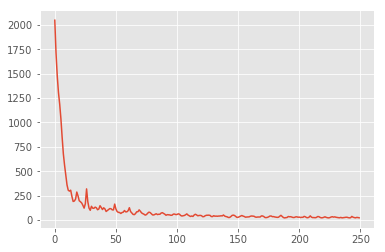

In [87]:
plt.plot(history.history['loss'])

In [88]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
validPredict = model.predict(validX)
nextPredict = model.predict(testX[-1:,:])

In [504]:
#y_list= df_half[['Half_Wh']][:145].values.astype('float32')

def create(dataset, look_back=1):
    dataX = []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
       
    return np.array(dataX)
input_x=create(df_half[['Half_Wh']].values,look_back=96)
next_x = model1.predict(input_x)
#Yp.append(next_x)

In [89]:
print(nextPredict,df_valid[0:1].values)

[[1.5887082]] [[0.00277778]]


In [90]:
from sklearn.metrics import r2_score
r2_score(testY,testPredict)

#r = 1- ((sum((testY-testPredict)^2))/(sum((testY-(testY/len(testY)))^2)))
#testY

0.9789769163000436

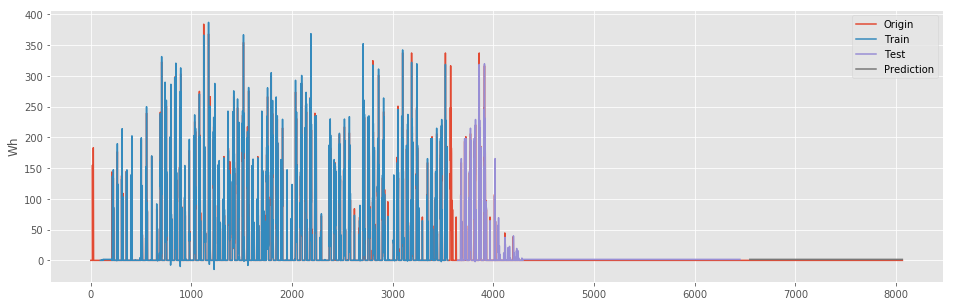

In [91]:
trainPredictPlot = np.empty_like(train_test)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(train_test)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(train_test)-1, :] = testPredict

np_all = np.concatenate((train_test,valid),axis=0)
validPredictPlot = np.empty_like(np_all)
validPredictPlot[:, :] = np.nan
validPredictPlot[len(train_test)+look_back:-1, :] = validPredict


#add time range

# plot baseline and predictions
plt.figure(figsize=(16,5))
#plt.plot_date(time,np_all/1000)
plt.plot(np_all,label='Origin')
plt.plot(trainPredictPlot,label='Train')
plt.plot(testPredictPlot,label='Test')
plt.plot(validPredictPlot,label='Prediction')
plt.ylabel('Wh')
plt.legend()
#plt.gca().set(ylable='kWh')
plt.show()

In [118]:
# add time and plot
time_index = pd.date_range(start='12/23/2019 00:00:00', end='6/07/2020 23:30:00', freq='30T')
df_all = pd.DataFrame(np_all,columns={'Actual'}).set_index(time_index)
df_trainPredictPlot = pd.DataFrame(trainPredictPlot,columns={'Train'}).set_index(time_index[:subset_num])
df_testPredictPlot = pd.DataFrame(testPredictPlot,columns={'Test'}).set_index(time_index[:subset_num])
df_validPredictPlot = pd.DataFrame(validPredictPlot,columns={'Prediction'}).set_index(time_index)
df_all_plot = pd.concat([df_all, df_trainPredictPlot,df_testPredictPlot,df_validPredictPlot], axis=1)

Text(0, 0.5, 'Wh')

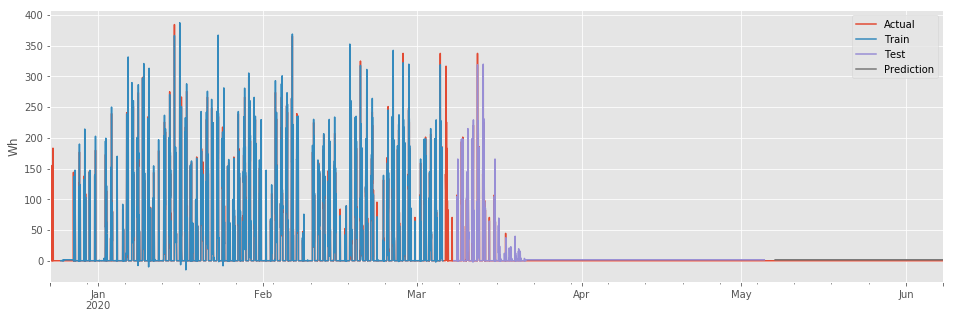

In [517]:
df_all_plot.set_index(df_all_plot.index).plot(figsize=(16,5))
plt.ylabel('Wh')

Text(0, 0.5, 'Wh')

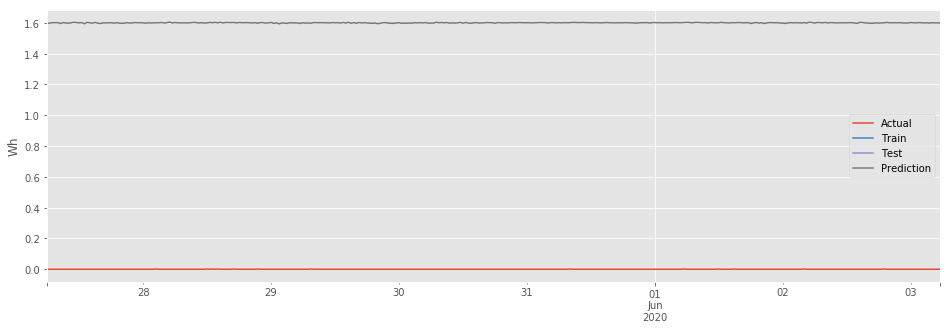

In [518]:
df_all_plot[7500:7836].set_index(df_all_plot[7500:7836].index).plot(figsize=(16,5))
plt.ylabel('Wh')

Text(0, 0.5, 'Wh')

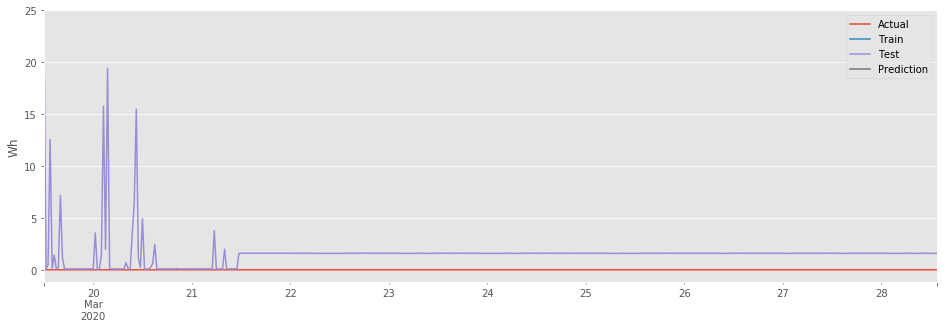

In [523]:
df_all_plot[4200:4636].set_index(df_all_plot[4200:4636].index).plot(figsize=(16,5))
plt.ylabel('Wh')

Text(0, 0.5, 'Wh')

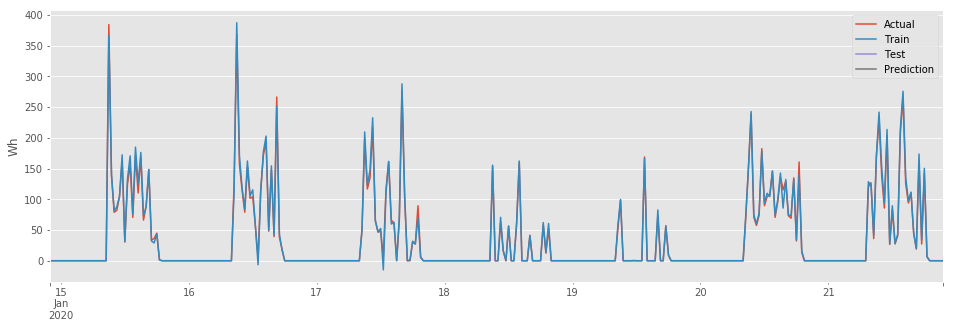

In [522]:
df_all_plot[1100:1436].set_index(df_all_plot[1100:1436].index).plot(figsize=(16,5))
plt.ylabel('Wh')

In [92]:
model.save('coffee_machine_ann.h5')

In [94]:
#from numpy import loadtext
from keras.models import load_model
model1 = load_model('coffee_machine_ann.h5')
model1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 180)               17460     
_________________________________________________________________
dense_13 (Dense)             (None, 120)               21720     
_________________________________________________________________
dense_14 (Dense)             (None, 60)                7260      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 61        
Total params: 46,501
Trainable params: 46,501
Non-trainable params: 0
_________________________________________________________________


In [98]:
score1 =model1.evaluate(trainX, trainY, verbose =0)

In [99]:
score1

[21.39035080503257, 21.39035415649414, 1.7356996536254883, 123386616.0]

In [11]:
# with lockdown
mad_mean_ratio = 1.69*2903/df_half['Half_Wh'][6451-2903:6451].sum()
mad_mean_ratio

0.3590535832345348